In [28]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [29]:
DATA_PATH = "../data_25ms.json"

In [30]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [31]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [32]:
# load data
X, y = load_data(DATA_PATH)

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Data succesfully loaded!


In [33]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 39)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,906 (659.79 KB)

 Trainable params: 168,906 (659.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.3873 - loss: 4.2544 - val_accuracy: 0.6070 - val_loss: 1.1623
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.5627 - loss: 1.1639 - val_accuracy: 0.6438 - val_loss: 0.9036
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.6421 - loss: 0.9022 - val_accuracy: 0.6996 - val_loss: 0.7577
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.6909 - loss: 0.7723 - val_accuracy: 0.7301 - val_loss: 0.6791
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.7162 - loss: 0.7066 - val_accuracy: 0.7451 - val_loss: 0.6381
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.7314 - loss: 0.6696 - val_accuracy: 0.7599 - val_loss: 0.6097
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.7461 - loss: 0.6399 - val_accuracy: 0.7658 - val_loss: 0.5916
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.7522 - loss: 0

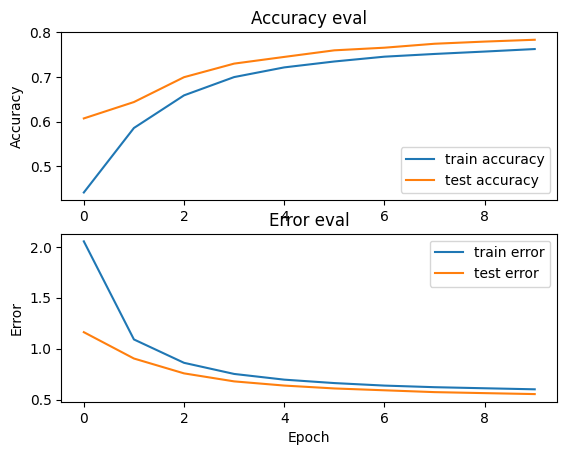

In [34]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

# plot accuracy and error as a function of the epochs
plot_history(history)

In [35]:
# predict on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

2690/2690 - 5s - 2ms/step - accuracy: 0.7837 - loss: 0.5544

Test accuracy: 0.7836679220199585


In [38]:
# predict on a sample
X_to_predict = X_test[100]
y_to_predict = y_test[100]
X_to_predict = X_to_predict[np.newaxis, ...]
prediction = model.predict(X_to_predict)
predicted_index = np.argmax(prediction)
print(f"Target: {y_to_predict}, Predicted label: {predicted_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Target: 2, Predicted label: 0
